**Identification of splitting variable and value**
- Top down and greedy approach
- Binary recursive splitting
- By minimizing residual sum of squares (Res_SS)

**Example**

Develop a tree based model for predicting conversion using temperature, time and kappa number as factors. The data is given in Mult_Reg_Conversion.xls

In [1]:
#Import the packages
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [2]:
#Import the dataset
data = pd.read_excel('Mult_Reg_Conversion.xls')

In [3]:
#Check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SL No.        16 non-null     int64  
 1   Temperature   16 non-null     int64  
 2   Time          16 non-null     float64
 3   Kappa_Number  16 non-null     float64
 4   Conversion    16 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 768.0 bytes


We remove the SL No. column.

In [5]:
#Data preprocessing
data = data.iloc[:,1:5]

In [6]:
#Explore the dataset
data.head()

,Temperature,Time,Kappa_Number,Conversion
0,1300,0.0120,7.5,49.0
1,1300,0.0120,9.0,50.2
2,1300,0.0115,11.0,50.5
3,1300,0.0130,13.5,48.5
4,1300,0.0135,17.0,47.5


So, we find that all the variables are continuous variables.

Lets ignore the time variable for now.

In [7]:
# Separate x's 
x = data.iloc[:,[0,2]]
#Check x
x.head()

,Temperature,Kappa_Number
0,1300,7.5
1,1300,9.0
2,1300,11.0
3,1300,13.5
4,1300,17.0


In [8]:
#Separate y
y = data.Conversion

As the dataset has only 16 observations, we don't do Train-Test split. We build the model on the whole dataset.

In [9]:
#Specify the CART model
model = tree.DecisionTreeRegressor()

In [10]:
#Fit the model
model = model.fit(X=x,y=y)

In [11]:
#Model accuarcy
rsq = model.score(X=x,y=y)
rsq

1.0

**Hyper parameter tuning**

In [12]:
#Hyper parameter tuning
paramgrid = {'min_samples_split':[4,6,8,10]}

In [13]:
#Set up the search
search = GridSearchCV(estimator=model,param_grid=paramgrid,scoring='neg_mean_squared_error',cv=4,verbose= True)

In [14]:
#Fit the search to the data
search = search.fit(X=x,y=y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [15]:
#Best parameters
search.best_params_

{'min_samples_split': 4}

We can specify the number of leaf nodes, i.e, the number of total classes of data.

In [16]:
#Specify the optimum tree model
model = tree.DecisionTreeRegressor(min_samples_split=4,max_leaf_nodes=5)

In [17]:
#Fit the model to the data
model.fit(X=x,y=y)

DecisionTreeRegressor(max_leaf_nodes=5, min_samples_split=4)

In [18]:
#Model accuracy 
rsq = model.score(x,y)
rsq

0.9726147400308325

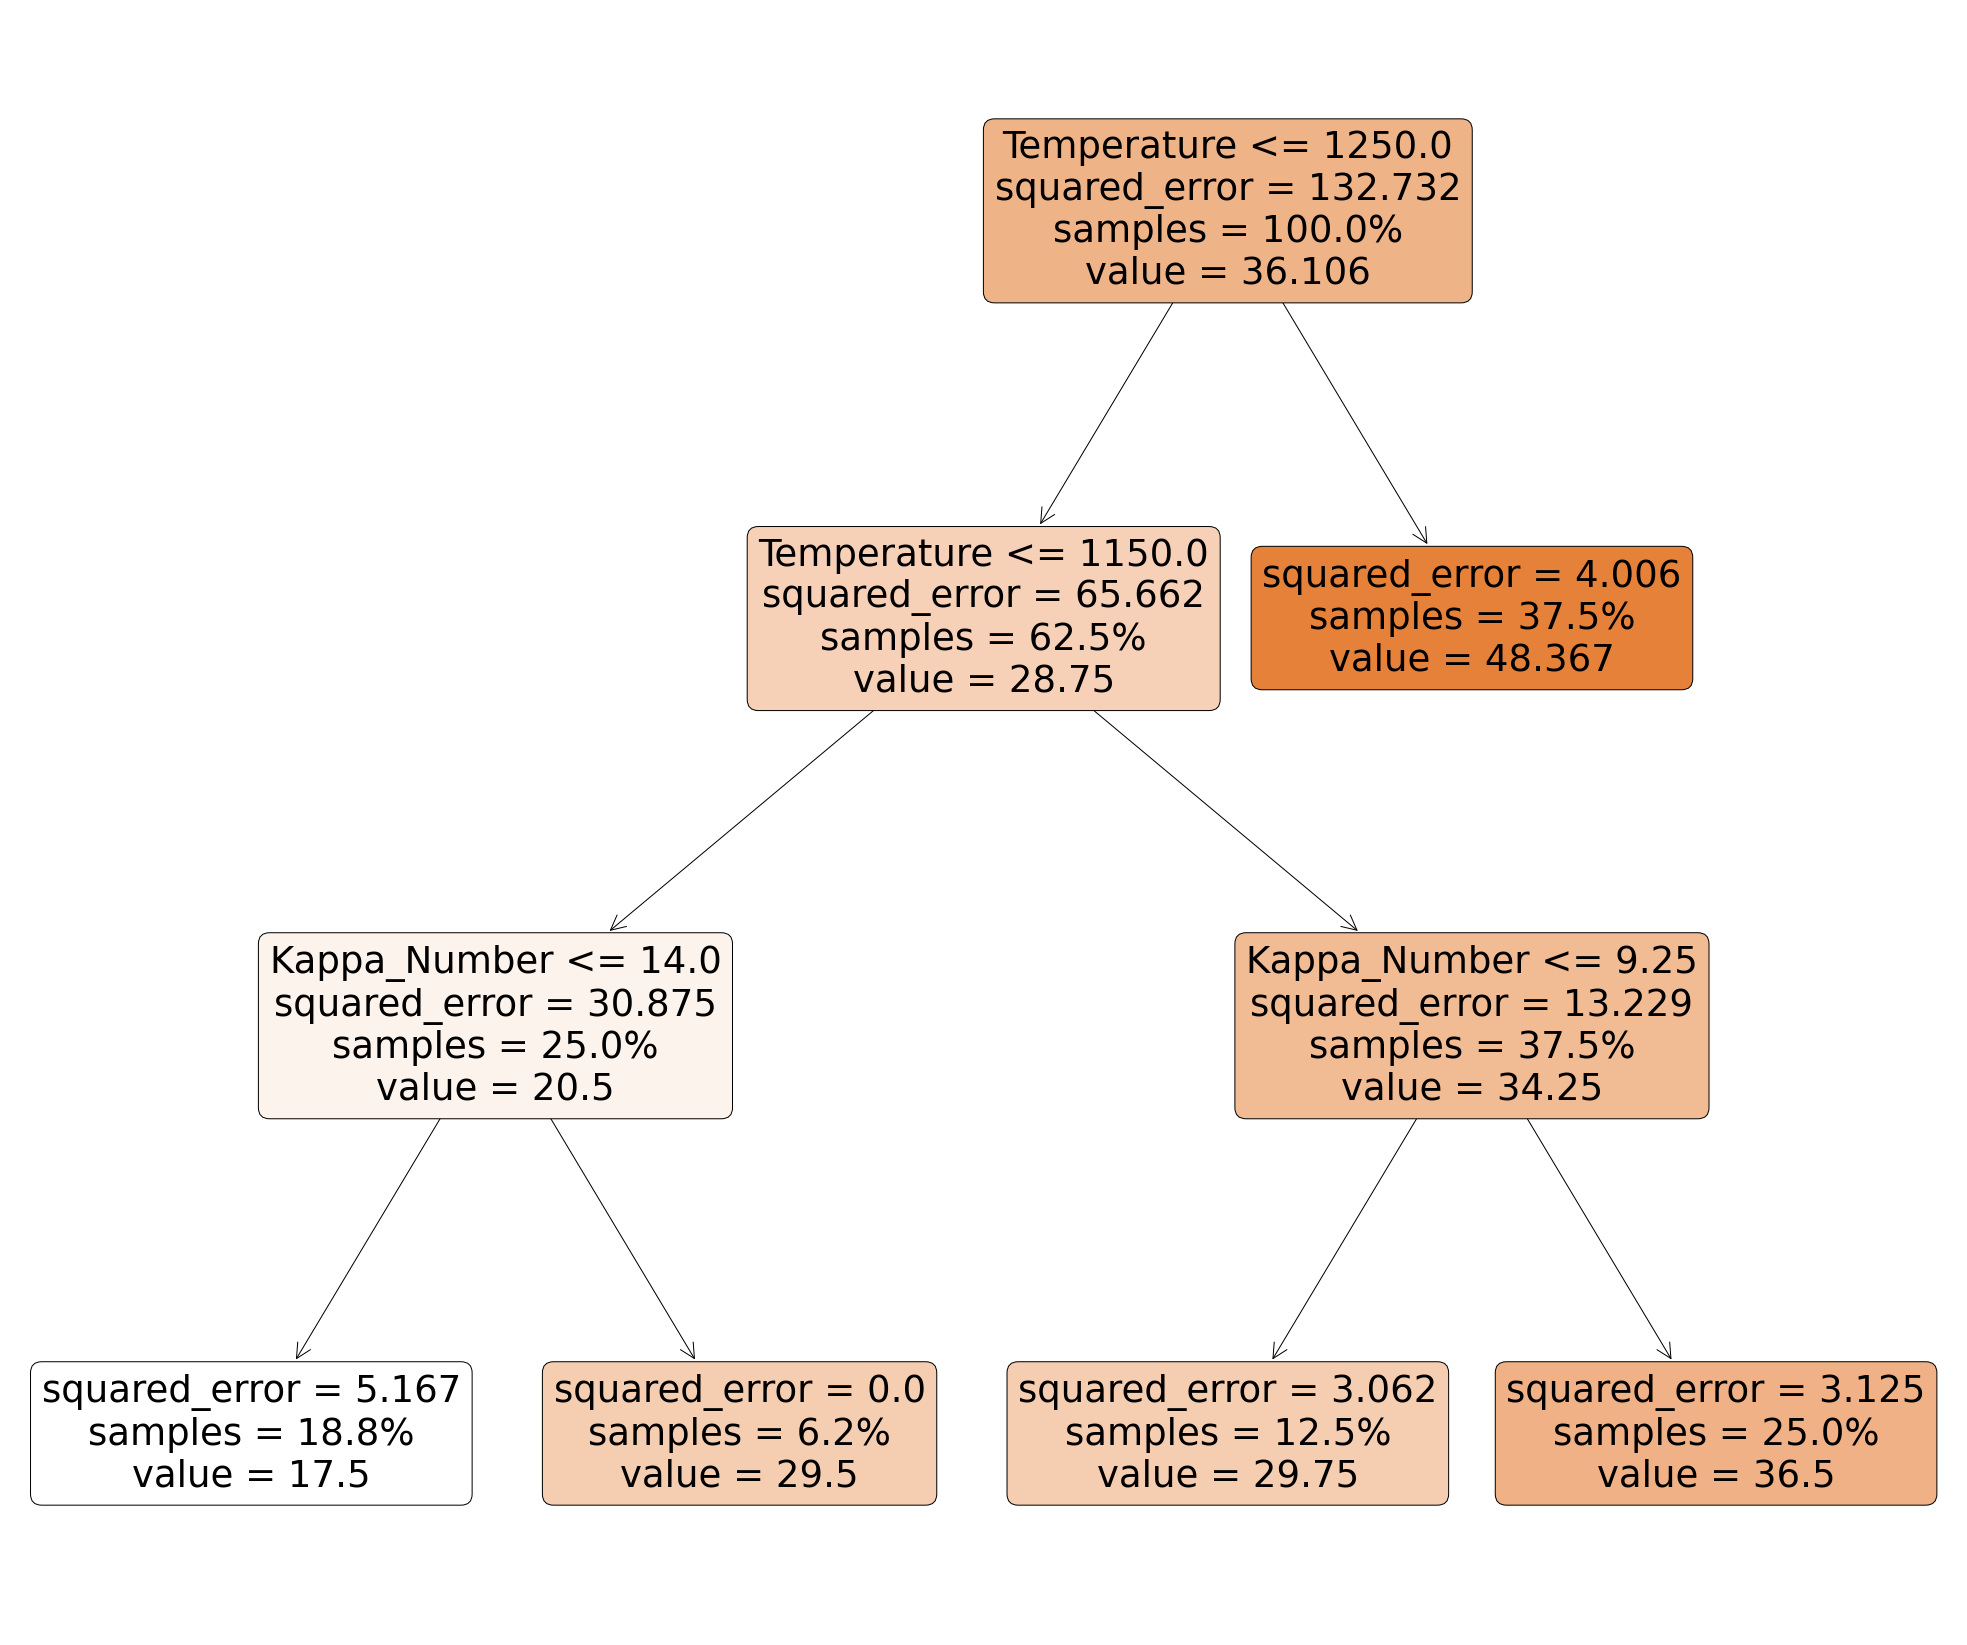

In [19]:
#Plot tree
plt.figure(figsize=(35,30))
tree.plot_tree(decision_tree=model,feature_names=x.columns,filled=True,proportion=True,rounded=True)
plt.show()